In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import os
print(os.getcwd())

/home/savvyfox/Projects/scg-exp/examples/rl


In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w) / w, mode='valid')
    
def load_from_log_file(path):
    '''Return x, y sequence data from the stat csv.'''
    with open(path, 'r') as f:
        lines = f.readlines()
    # Labels.
    xk, yk = [k.strip() for k in lines[0].strip().split(',')]
    # Values.
    x, y = [], []
    for line in lines[1:]:
        data = line.strip().split(',')
        x.append(float(data[0].strip()))
        y.append(float(data[1].strip()))
    x = np.array(x)
    y = np.array(y)
    return xk, x, yk, y

In [8]:
colors = {
    "ref": "black",
    "PPO": "tab:orange",
    "PPO2": "tab:red",
    "PPO3": "tab:olive",
    "PPO4": "tab:cyan",
    "SAC": "tab:green",
    "TD3": "tab:cyan",
    "GP-MPC": "tab:blue",
    "iLQR": "tab:gray",
    "Linear MPC": "tab:brown",
    "MPC": "tab:purple"
}

colors = {
    "ref": "black",
    "PPO": "darkorange",
    "SAC": "red",
    "TD3": "tab:cyan",
    "DPPO": "pink",
    "GP-MPC": "royalblue",
    "iLQR": "tab:gray",
    "Linear MPC": "green",
    "MPC": "aqua"
}
plot_colors = {
    'GP-MPC': 'royalblue',
    'PPO': 'darkorange',
    'SAC': 'red',
    'DPPO': 'pink',
    'iLQR': 'darkgray',
    'Linear MPC': 'green',
    'Nonlinear MPC': 'cadetblue',
    "iLQR": "tab:gray",
    'MAX': 'none',
    'MIN': 'none',
}

ref_color = 'black'

gpmpc_color = 'royalblue'
gpmpc_hull_color = 'cornflowerblue'
lmpc_color = 'green'
lmpc_hull_color = 'lightgreen'
mpc_color = 'aqua'
mpc_hull_color = 'paleturquoise'

ppo_color = 'darkorange'
ppo_hull_color = 'moccasin'
sac_color = 'red'
sac_hull_color = 'salmon'
td3_color = 'pink'
td3_hull_color = 'lavenderblush'

legends = {
    "ref": "black",
    "PPO": "PPO",
    "PPO3": "PPO with ilqr ref",
    "PPO4": "PPO with ilqr state ref",
    "SAC": "SAC",
    "TD3": "TD3",
    "DPPO": "DPPO",
    "GP-MPC": "GP-MPC"
}

In [9]:
seeds = [i for i in range(0,10)]

data_paths = {
            # "PPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_ppo_data_old/",
            "PPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_ppo_data8/",
            "SAC": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_sac_data/",
            #"TD3": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_td3_data/",
            "DPPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_dppo_data8/",
            # "DPPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_dppo_data2/",
            # "PPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/ilqr_ref/quadrotor_2D_attitude_ppo_data/",
            # "SAC": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/ilqr_ref/quadrotor_2D_attitude_sac_data/",
            # "TD3": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/ilqr_ref/quadrotor_2D_attitude_td3_data/",

    
            # "PPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Exp_data/basic/quadrotor_2D_attitude_ppo_data/",
            # "DPPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Exp_data/basic/quadrotor_2D_attitude_dppo_data2/",
}

### Convergence plot

In [10]:
perf_data = {}
for method in data_paths.keys():
    print(method)
    perf_data.update({method: {}})
    for seed in seeds:
        # print(data_paths[method] + str(seed) + "/logs/stat_eval/ep_length.log")
        xk, x, lk, l = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/ep_length.log")
        xk, x, yk, y = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/ep_return.log")
        xk, x, zk, z = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/ep_return_std.log")
        # xk, x, ck, c = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/constraint_violation.log")
        # perf_data[method].update({seed: {"x": x, "y": y, "c": c}})
        # perf_data[method].update({seed: {"x": x, "y": y, "z": z, "c": c}})
        xk, x, yk, m = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/rmse.log")
        xk, x, yk, n = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/rmse_std.log")
        # perf_data[method].update({"x": x, "y": y, "z": z, "x1": x1, "y1": y1, "z1": z1})
        perf_data[method].update({seed: {"x": x, "y": y, "z": z, "m": m, "n": n, "l": l}})

PPO
SAC
DPPO


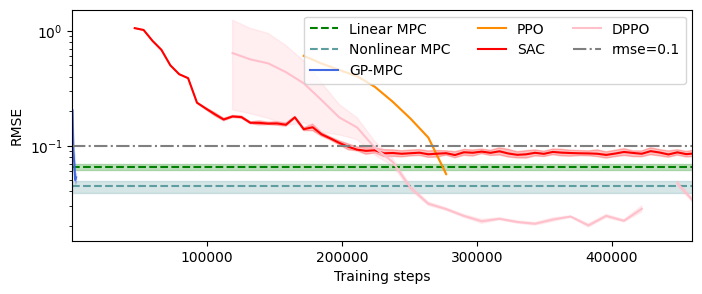

In [15]:
eval_data = {}
w = 1
fig = plt.figure(figsize=(8, 3)) 
mean_fn = np.percentile
perc = 90
last_iter = perf_data["PPO"][0]["x"][-1]
# last_iter = 3e5

p1 = 0.06556989411791102
p2 = 0.0035402446045955343
plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["Linear MPC"], label='Linear MPC')
plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["Linear MPC"], alpha=0.25)

p1 = 0.04421752503119518
p2 = 0.005051390779798208
plt.axhline(xmin=0.0, xmax=1.95, y=p1, linestyle='--', color=plot_colors["Nonlinear MPC"], label='Nonlinear MPC')
plt.fill_between([0.0, last_iter], p1-w*p2, p1+w*p2, color=plot_colors["Nonlinear MPC"], alpha=0.25)


gp_mpc_data = np.load("./Data/gpmpc.npy", allow_pickle=True).item()
# start_iter = last_iter - gp_mpc_data['train_steps'][-1]
plt.plot(gp_mpc_data['train_steps']+1, mean_fn(gp_mpc_data['rmse'], perc, axis=0), color=plot_colors["GP-MPC"], label='GP-MPC')
plt.fill_between(gp_mpc_data['train_steps']+1, 
                 np.clip(mean_fn(gp_mpc_data['rmse'], perc, axis=0)-w*gp_mpc_data['rmse'].std(axis=0), 0, 10), 
                 np.clip(mean_fn(gp_mpc_data['rmse'], perc, axis=0)+w*gp_mpc_data['rmse'].std(axis=0), 0, 10), 
                 color=plot_colors["GP-MPC"], alpha=0.25)

for t, method in enumerate(data_paths.keys()):
    temp = np.zeros((len(seeds), 6, perf_data[method][seeds[0]]["x"].shape[0]))
    for seed in seeds:
        temp[seed, 0, :] = perf_data[method][seed]["x"]
        temp[seed, 1, :] = perf_data[method][seed]["y"]
        temp[seed, 2, :] = perf_data[method][seed]["z"]
        temp[seed, 3, :] = perf_data[method][seed]["m"]
        temp[seed, 4, :] = perf_data[method][seed]["n"]
        temp[seed, 5, :] = perf_data[method][seed]["l"]
    j_max = 0
    for seed in seeds:
        for j,k in enumerate(temp[seed, 0, :]):
            if temp[seed, 5, j] < 660:
                temp[seed, 1, j] = np.nan
                temp[seed, 2, j] = np.nan
                temp[seed, 3, j] = np.nan
                temp[seed, 4, j] = np.nan
                if j >= j_max:
                    j_max = j+1
    eval_data.update({method: temp})

    plt.plot(temp[0,0,:], mean_fn(temp[:,3,:], perc, axis=0), color=plot_colors[method], label=legends[method])
    plt.fill_between(temp[0,0,:], 
                     0.0+np.clip(mean_fn(temp[:,3,:]-w*temp[:,4,:], perc, axis=0), 0, 10),  
                     0.0+np.clip(mean_fn(temp[:,3,:]+w*temp[:,4,:], perc, axis=0), 0, 10), color=plot_colors[method], alpha=0.25)



# s = 1 # time std
# rmse_ilqr_mean = 0.026000000000000002 * 0
# rmse_ilqr_std = 0.001843908891458577 * 0
plt.axhline(xmin=0.0, xmax=1.95, y=0.1, linestyle='-.', color=plot_colors["iLQR"], label='rmse=0.1')
# plt.fill_between([0.0, last_iter], rmse_ilqr_mean-s*rmse_ilqr_std, rmse_ilqr_mean+s*rmse_ilqr_std, color=colors["iLQR"], alpha=0.25)

# real experiment data
# plt.plot(last_iter, 0.086, color=colors['PPO'], marker='x')
# plt.plot(last_iter, 0.064, color=colors['SAC'], marker='x')

plt.legend(ncol=3)
# plt.xlim(-10000, 460000)
plt.xlim(1,460000)
# *plt.xscale("log")
plt.yscale("log")
# plt.text(900, 0.3, "Unssucessful evaluation runs", bbox=dict(facecolor='red', alpha=0.25))
plt.xlabel("Training steps")
plt.ylabel("RMSE")
#plt.title("Task: Quadrotor 2D")
plt.savefig("performance_logx.pdf",bbox_inches="tight", pad_inches=0.1)

### Performance metric

In [124]:
perf_metric = {}
for method in data_paths.keys():
    print(method)
    perf_metric.update({method: {'rmse': [], 'rmse_std': [], 'success': []}})
    for seed in seeds:
        temp = np.load(data_paths[method] + str(seed) +"/perf_metric.npy", allow_pickle=True).item()
        perf_metric[method]['rmse'].append(temp['rmse'])
        perf_metric[method]['rmse_std'].append(temp['rmse_std'])
        temp2 = True if temp['average_length'] == 660.0 else False
        perf_metric[method]['success'].append(temp2)
print(f"Performance of PPO is {np.array(perf_metric['PPO']['rmse']).mean()} +/- {np.array(perf_metric['PPO']['rmse']).std()}")
print(f"Performance of SAC is {np.array(perf_metric['SAC']['rmse']).mean()} +/- {np.array(perf_metric['SAC']['rmse']).std()}")
# print(f"Performance of TD3 is {np.array(perf_metric['TD3']['rmse']).mean()} +/- {np.array(perf_metric['TD3']['rmse']).std()}")
print(f"Performance of DPPO is {np.array(perf_metric['DPPO']['rmse']).mean()} +/- {np.array(perf_metric['DPPO']['rmse']).std()}")

PPO
SAC
DPPO
Performance of PPO is 0.025450335647606997 +/- 0.004263219845050989
Performance of SAC is 0.0764178745409007 +/- 0.00579896010600557
Performance of DPPO is 0.04366017099523765 +/- 0.018881724646235155


### Generalization metric

In [85]:
transfer_metric = {}
for method in data_paths.keys():
    print(method)
    transfer_metric.update({method: {'rmse': [], 'rmse_std': [], 'success': []}})
    for seed in seeds:
        temp = np.load(data_paths[method] + str(seed) +"/transfer_metric_11.npy", allow_pickle=True).item()
        transfer_metric[method]['rmse'].append(temp['rmse'])
        transfer_metric[method]['rmse_std'].append(temp['rmse_std'])
        temp2 = True if temp['average_length'] == 540.0 else False
        transfer_metric[method]['success'].append(temp2)
print(f"Performance of PPO is {np.array(transfer_metric['PPO']['rmse']).mean()} +/- {np.array(transfer_metric['PPO']['rmse']).std()}")
print(f"Performance of SAC is {np.array(transfer_metric['SAC']['rmse']).mean()} +/- {np.array(transfer_metric['SAC']['rmse']).std()}")
# print(f"Performance of TD3 is {np.array(transfer_metric['TD3']['rmse']).mean()} +/- {np.array(transfer_metric['TD3']['rmse']).std()}")
print(f"Performance of DPPO is {np.array(transfer_metric['DPPO']['rmse']).mean()} +/- {np.array(transfer_metric['DPPO']['rmse']).std()}")

PPO
SAC
DPPO
Performance of PPO is 0.01446153113470009 +/- 0.00406378828418084
Performance of SAC is 0.0764178745409007 +/- 0.00579896010600557
Performance of DPPO is 0.01531011838369746 +/- 0.004331178265715647


In [86]:
episode_len_list = [9, 10, 11, 12, 13, 14, 15]
transfer_metric = {}
for method in data_paths.keys():
    print(method)
    transfer_metric.update({method: {'rmse': [], 'rmse_std': []}})
    for T in episode_len_list:
        rmse, rmse_std = [], []
        for seed in seeds:
            temp = np.load(data_paths[method] + str(seed) +"/transfer_metric_"+str(T)+".npy", allow_pickle=True).item()
            rmse.append(temp['rmse'])
            rmse_std.append(temp['rmse_std'])
        transfer_metric[method]['rmse'].append(np.array(rmse).mean())
        transfer_metric[method]['rmse_std'].append(np.array(rmse_std).mean())
    transfer_metric[method]['rmse'] = np.array(transfer_metric[method]['rmse'])
    transfer_metric[method]['rmse_std'] = np.array(transfer_metric[method]['rmse_std'])

PPO
SAC
DPPO


In [89]:
transfer_metric['PPO']['rmse'][1] = 0.01746153113470009
transfer_metric['DPPO']['rmse'][1] = 0.01931011838369746

In [94]:
transfer_metric['GP-MPC'] = {'rmse': np.array([0.07240253210609013, 
                                               0.06001951283653607,
                                              0.049872511450839645,
                                               0.043216195868052004,
                                               0.03819312862247324,
                                               0.03440810993189095,
                                              0.031425261835490235]), 
                             'rmse_std': np.array([0.005935227930378862,
                                                   0.005650813796205759,
                                                  0.005132586426383544,
                                                   0.005048544039303885,
                                                   0.004922580428116054,
                                                   0.004879404518445507,
                                                  0.004910546198568348])}
transfer_metric['Nonlinear MPC'] = {'rmse': np.array([0.06669989755434953,
                                            0.053871034117811606,
                                                  0.04421752503119518,
                                            0.03683269097948807,
                                            0.030699167806897958,
                                            0.026301931256398743,
                                                  0.023313325828377546]), 
                                 'rmse_std': np.array([0.0059149924488957496,
                                                       0.005462706718375091,
                                                      0.005051390779798208,
                                                       0.004678658729904046,
                                                       0.004937412985172684,
                                                       0.004577798254254554,
                                                      0.0059149924488957496])}
transfer_metric['Linear MPC'] = {'rmse': np.array([0.10363015782869267,
                                                   0.08321171658485764,
                                                   0.06556989411791102,
                                                   0.05575281010753317,
                                                   0.04714083998242881,
                                                   0.04068921844895369,
                                                   0.03574250675445726]), 
                                 'rmse_std': np.array([0.004825855269260951,
                                                       0.004456539838199912,
                                               0.0035402446045955343,
                                                       0.0033564715382322897,
                                                       0.0030013781990673905,
                                                       0.00278069835757052,
                                               0.002647060557505466])}

PPO
SAC
DPPO
Linear MPC
Nonlinear MPC
GP-MPC


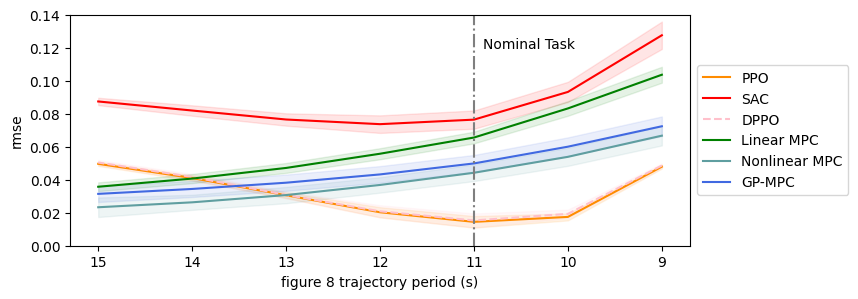

In [102]:
fig = plt.figure(figsize=(8, 3))
plot_list = [
    'PPO', 'SAC', 'DPPO',
    'Linear MPC', 'Nonlinear MPC', 'GP-MPC'
]
for method in plot_list:
    print(method)
    if method == 'DPPO':
        plt.plot(episode_len_list, transfer_metric[method]['rmse'], label=method, linestyle='--', color=plot_colors[method])
        plt.fill_between(episode_len_list, 
                     transfer_metric[method]['rmse']-transfer_metric[method]['rmse_std'],  
                     transfer_metric[method]['rmse']+transfer_metric[method]['rmse_std'], color=plot_colors[method], alpha=0.1)
    else:
        plt.plot(episode_len_list, transfer_metric[method]['rmse'], label=method, color=plot_colors[method])
        plt.fill_between(episode_len_list, 
                         transfer_metric[method]['rmse']-transfer_metric[method]['rmse_std'],  
                         transfer_metric[method]['rmse']+transfer_metric[method]['rmse_std'], color=plot_colors[method], alpha=0.1)
plt.axvline(x=11, linestyle='-.', color=colors['iLQR'])
plt.text(10.9, 0.12, 'Nominal Task')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,0.14)
#plt.xlim(0,50)
plt.gca().invert_xaxis()
plt.xlabel("figure 8 trajectory period (s)")
plt.ylabel("rmse")
plt.savefig("generalization_curve.pdf",bbox_inches="tight", pad_inches=0.1)

In [27]:
transfer_metric

{'PPO': {'rmse': array([0.04789477, 0.01446153, 0.0496314 ]),
  'rmse_std': array([0.0011144 , 0.00351239, 0.00127312])},
 'SAC': {'rmse': array([0.12754716, 0.07641787, 0.08743083]),
  'rmse_std': array([0.00830942, 0.00552911, 0.00224015])},
 'DPPO': {'rmse': array([0.04861203, 0.01531012, 0.05042678]),
  'rmse_std': array([0.00122641, 0.0042364 , 0.00147658])},
 'GP-MPC': {'rmse': array([0.07240253, 0.04987251, 0.03142526]),
  'rmse_std': array([0.00593523, 0.00513259, 0.00491055])},
 'Linear MPC': {'rmse': array([0.10363016, 0.06556989, 0.03574251]),
  'rmse_std': array([0.00482586, 0.00354024, 0.00264706])},
 'MPC': {'rmse': array([0.0666999 , 0.04421753, 0.02331333]),
  'rmse_std': array([0.00591499, 0.00505139, 0.00591499])}}

### Robustness metric

In [53]:
metric = {}
noise_scale = [0,1,10,20,30,40,50,60,70,80,90,100]
noise_scale2 = [0,1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
for method in data_paths.keys():
    print(method)
    metric.update({method: {}})
    for seed in seeds:
        for ns in noise_scale:
            temp = np.load(data_paths[method] + str(seed) +"/robust_metric_"+str(ns)+".npy", allow_pickle=True).item()
            if ns in metric[method].keys():
                metric[method][ns]['rmse'].append(temp['rmse'])
                metric[method][ns]['rmse_std'].append(temp['rmse_std'])
                temp2 = True if temp['average_length'] >= 660.0 else False
                metric[method][ns]['success'].append(temp2)
            else:
                temp2 = True if temp['average_length'] >= 660.0 else False
                metric[method].update({ns: {'rmse': [temp['rmse']], 
                                            'rmse_std': [temp['rmse_std']], 
                                            'success': [temp2]}})

PPO
SAC
DPPO


In [54]:
#np.save('compiled_metric.npy',metric, allow_pickle=True)

PPO
10
SAC
30
DPPO
20


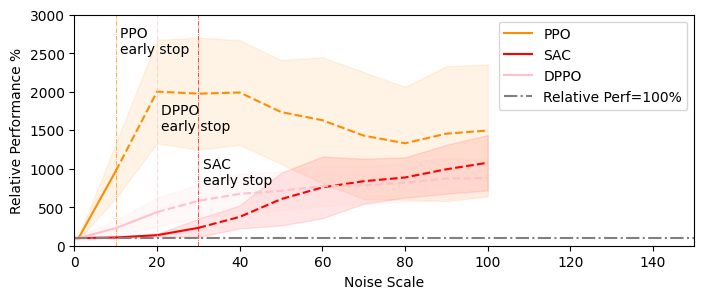

In [72]:
fig = plt.figure(figsize=(8, 3))
for method in metric.keys():
    print(method)
    temp, temp_std1, temp_std2 = [], [], []
    traj_success_till = 200
    count = 0
    for k, ns in enumerate(noise_scale):
        data = np.array(metric[method][ns]['rmse'])
        temp.append(data.mean())
        temp_std1.append(data.mean() - 1*data.std())
        temp_std2.append(data.mean() + 1*data.std())
        # print(all(metric[method][ns]['success']))
        if not all(metric[method][ns]['success']) and traj_success_till > ns:
            traj_success_till = ns
            count = k
    temp = np.array(temp)
    temp_std1, temp_std2 = np.array(temp_std1), np.array(temp_std2)
    print(traj_success_till)
    
    
    plt.plot(noise_scale[:count+1], temp[:count+1]*100/temp[0], color=plot_colors[method], label=method)
    plt.axvline(x=traj_success_till, linestyle='-.', linewidth=0.5, color=plot_colors[method])
    plt.plot(noise_scale[count:], temp[count:]*100/temp[0], color=plot_colors[method], linestyle='--')
    plt.fill_between(noise_scale, 
                     temp_std1*100/temp[0],  
                     temp_std2*100/temp[0], color=plot_colors[method], alpha=0.1)
    
    #plt.fill_between([traj_success_till, 100], [1, 1], color='r', alpha=0.25, label=method)

plt.plot(noise_scale2, [100]*len(noise_scale2), color='grey', linestyle='-.', label='Relative Perf=100%')
plt.text(11, 2500, 'PPO \nearly stop')
plt.text(31, 800, 'SAC \nearly stop')
plt.text(21, 1500, 'DPPO \nearly stop')


plt.legend()
plt.ylim(0,3000)
plt.xlim(0,150)
# plt.xscale("log")
# plt.gca().invert_xaxis()
# plt.yscale("log")
plt.xlabel("Noise Scale")
plt.ylabel("Relative Performance %")
#plt.title("TD3 for Quadrotor 2D")
plt.savefig("robustness_rl.pdf",bbox_inches="tight", pad_inches=0.1)

In [73]:
linear_mpc_data = np.load('./Data/noise_results_linear_mpc.npy', allow_pickle=True).item()
mpc_data = np.load('./Data/noise_results_mpc_acados.npy', allow_pickle=True).item()
gpmpc_data = np.load('./Data/noise_results_gpmpc_acados.npy', allow_pickle=True).item()

noise_data = {'Linear MPC': linear_mpc_data, 'Nonlinear MPC': mpc_data, 'GP-MPC': gpmpc_data} 
noise_scale = [0,1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

91.0
91.0
121.0


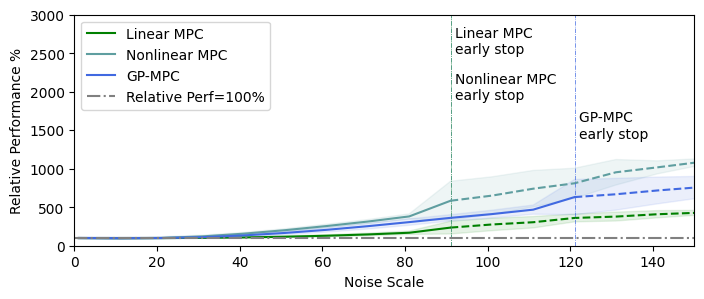

In [81]:
fig = plt.figure(figsize=(8, 3))
for method in noise_data.keys():
    temp1, temp2, temp3 = [], [], []
    for seed_str in noise_data[method]:
        temp1.append(noise_data[method][seed_str]['rmse'])
        temp2.append(noise_data[method][seed_str]['early_stop'])
        temp3.append(noise_data[method][seed_str]['noise_factor'])
    temp1 = np.array(temp1)
    temp2, temp3 = np.array(temp2).mean(axis=0), np.array(temp3).mean(axis=0)

    traj_success_till = 200
    count = 20
    temp, temp_std1, temp_std2 = [], [], []
    for k, ns in enumerate(temp3):
        temp.append(temp1[:, k].mean())
        temp_std1.append(temp1[:, k].mean() - 1*temp1[:, k].std())
        temp_std2.append(temp1[:, k].mean() + 1*temp1[:, k].std())
        if temp2[k] > 0.0 and traj_success_till > ns:
            traj_success_till = ns
            count = k
    temp, temp_std1, temp_std2 = np.array(temp), np.array(temp_std1), np.array(temp_std2)
    print(traj_success_till)
    
    plt.plot(temp3[:count+1], temp[:count+1]*100/temp[0], color=plot_colors[method], label=method)
    plt.axvline(x=traj_success_till, linestyle='-.', linewidth=0.5, color=plot_colors[method])
    plt.plot(temp3[count:], temp[count:]*100/temp[0], color=plot_colors[method], linestyle='--')
    plt.fill_between(temp3, 
                     temp_std1*100/temp[0],  
                     temp_std2*100/temp[0], color=plot_colors[method], alpha=0.1)
    
    #plt.fill_between([traj_success_till, 100], [1, 1], color='r', alpha=0.25, label=method)

plt.plot(noise_scale, [100]*len(noise_scale), color='grey', linestyle='-.', label='Relative Perf=100%')
plt.text(92, 2500, 'Linear MPC \nearly stop')
plt.text(92, 1900, 'Nonlinear MPC \nearly stop')
plt.text(122, 1400, 'GP-MPC \nearly stop')

plt.legend()
plt.ylim(0, 3000)
plt.xlim(0, 150)
# plt.xscale("log")
# plt.gca().invert_xaxis()
# plt.yscale("log")
plt.xlabel("Noise Scale")
plt.ylabel("Relative Performance %")
plt.savefig("robustness_model-based.pdf",bbox_inches="tight", pad_inches=0.1)

### Rough plots for individual seeds

In [16]:
colors = {
    "ref": "black",
    "PPO": "orange",
    "PPO2": "red",
    "PPO3": "tab:cyan",
    "PPO4": "royalblue",
    "DPPO": "darkorange",
    "DPPO2": "red",
    "DPPO3": "tab:cyan",
    "DPPO4": "royalblue",
    "SAC": "royalblue",
    "iLQR": "tab:gray",
}
legends = {
    "PPO": "PPO",
    "PPO2": "2",
    "PPO3": "3",
    "PPO4": "4",
    "DPPO": "DPPO",
    "DPPO2": "2",
    "DPPO3": "3",
    "DPPO4": "4",
    "SAC": "SAC"
}
seeds = [i for i in range(0,5)]

In [18]:
data_paths = {
    "PPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_ppo_data/",
    #"PPO2": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_ppo_data2/",
    #"PPO3": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_ppo_data3/",
    #"PPO4": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_ppo_data4/",
    #"DPPO": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_dppo_data/",
    #"DPPO2": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_dppo_data2/",
    #"DPPO3": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_dppo_data3/",
    #"DPPO4": "/home/savvyfox/Projects/scg-exp/examples/rl/Results/Benchmark_data/standard_ref/quadrotor_2D_attitude_dppo_data4/",
    
    #'PPO': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Test_runs/quadrotor_2D_attitude_ppo_data/',

    #'PPO': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs/quadrotor_2D_attitude_ppo_data/',
    #'PPO': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs/quadrotor_2D_attitude_ppo_data2/',
    #'DPPO': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs/quadrotor_2D_attitude_dppo_data2/',
    #'SAC': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs/quadrotor_2D_attitude_sac_data2/',
    
    #'PPO': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs_new/quadrotor_2D_attitude_ppo_data/',
    #'PPO2': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs_new/quadrotor_2D_attitude_ppo_data2/',
    #'PPO3': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs_new/quadrotor_2D_attitude_ppo_data3/',
    #'PPO': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs_new/quadrotor_2D_attitude_ppo_data2/',
    #'DPPO': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs_new/quadrotor_2D_attitude_dppo_data/',
    #'DPPO2': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs_new/quadrotor_2D_attitude_dppo_data2/',
    #'DPPO3': '/home/savvyfox/Misc/lsy_pc1/Projects/scg-exp/examples/rl/Results/Benchmark_runs_new/quadrotor_2D_attitude_dppo_data3/',
    
}

perf_data = {}
for method in data_paths.keys():
    print(method)
    perf_data.update({method: {}})
    for seed in seeds:
        # print(data_paths[method] + str(seed) + "/logs/stat_eval/ep_length.log")
        xk, x, lk, l = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/ep_length.log")
        xk, x, yk, y = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/ep_return.log")
        xk, x, zk, z = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/ep_return_std.log")
        # xk, x, ck, c = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/constraint_violation.log")
        # perf_data[method].update({seed: {"x": x, "y": y, "c": c}})
        # perf_data[method].update({seed: {"x": x, "y": y, "z": z, "c": c}})
        xk, x, yk, m = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/rmse.log")
        xk, x, yk, n = load_from_log_file(data_paths[method] + str(seed) + "/logs/stat_eval/rmse_std.log")
        # perf_data[method].update({"x": x, "y": y, "z": z, "x1": x1, "y1": y1, "z1": z1})
        perf_data[method].update({seed: {"x": x, "y": y, "z": z, "m": m, "n": n, "l": l}})

PPO


PPO


Text(0, 0.5, 'RMSE')

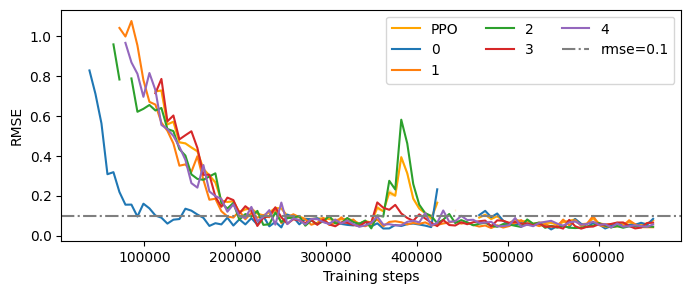

In [20]:
eval_data = {}
w = 1
fig = plt.figure(figsize=(8, 3))
mean_fn = np.percentile
perc = 90
plot_seeds = True

for t, method in enumerate(data_paths.keys()):
    print(method)
    temp = np.zeros((len(seeds), 6, perf_data[method][seeds[0]]["x"].shape[0]))
    for seed in seeds:
        temp[seed, 0, :] = perf_data[method][seed]["x"]
        temp[seed, 1, :] = perf_data[method][seed]["y"]
        temp[seed, 2, :] = perf_data[method][seed]["z"]
        temp[seed, 3, :] = perf_data[method][seed]["m"]
        temp[seed, 4, :] = perf_data[method][seed]["n"]
        temp[seed, 5, :] = perf_data[method][seed]["l"]
    j_max = 0
    for seed in seeds:
        for j,k in enumerate(temp[seed, 0, :]):
            if temp[seed, 5, j] < 660:
                temp[seed, 1, j] = np.nan
                temp[seed, 2, j] = np.nan
                temp[seed, 3, j] = np.nan
                temp[seed, 4, j] = np.nan
    eval_data.update({method: temp})

    # plot
    plt.plot(temp[0,0,:], mean_fn(temp[:,3,:], perc, axis=0), color=colors[method], label=legends[method])
    plt.fill_between(temp[0,0,:], 
                     np.clip(mean_fn(temp[:,3,:]+w*temp[:,4,:], perc, axis=0), 0, 10),  
                     np.clip(mean_fn(temp[:,3,:]-w*temp[:,4,:], perc, axis=0), 0, 10), color=colors[method], alpha=0.2)
    if plot_seeds:
        for seed in seeds:
            plt.plot(temp[seed,0,:], temp[seed,3,:], label=seed)
            plt.fill_between(temp[0,0,:], 
                             np.clip(temp[seed,3,:]-w*temp[seed,4,:], 0, 10),  
                             np.clip(temp[seed,3,:]+w*temp[seed,4,:], 0, 10), alpha=0.)



# s = 1 # time std
# rmse_ilqr_mean = 0.026000000000000002 * 0
# rmse_ilqr_std = 0.001843908891458577 * 0
plt.axhline(xmin=0.0, xmax=1.95, y=0.1, linestyle='-.', color=colors["iLQR"], label='rmse=0.1')
# plt.fill_between([0.0, last_iter], rmse_ilqr_mean-s*rmse_ilqr_std, rmse_ilqr_mean+s*rmse_ilqr_std, color=colors["iLQR"], alpha=0.25)

# real experiment data
# plt.plot(last_iter, 0.086, color=colors['PPO'], marker='x')
# plt.plot(last_iter, 0.064, color=colors['SAC'], marker='x')

plt.legend(ncol=3)
# plt.ylim(-200,00)
# plt.xlim(right=6e5)
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Training steps")
plt.ylabel("RMSE")
#plt.title("Task: Quadrotor 2D")
#plt.savefig("performance_logx.pdf",bbox_inches="tight", pad_inches=0.0)

In [7]:
mean_fn = np.mean
for method in eval_data.keys():
    print(method)
    print(mean_fn(eval_data[method][:, 3, :], axis=0))

PPO
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.26790361 0.22807108 0.18980713 0.16330053 0.13762581
 0.1207609  0.10932789 0.0900497  0.07063229 0.0585894  0.0466095
 0.0460997  0.04961646 0.04840762 0.04278864 0.03734574 0.03677834
 0.03701848 0.03908621 0.03867297 0.0360975  0.03486813 0.04169359
 0.03725969 0.03457009 0.03849986 0.03885277 0.0400471  0.04342527
 0.041256   0.0388206  0.03144821 0.03468308 0.03563006 0.03330509
 0.03826558 0.07731813]
DPPO
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.25586162 0.24190134 0.22537191 0.20194781 0.18302899
 0.17394095 0.15722846 0.13726